In [9]:
class DFA:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def accepts(self, input_sequence):
        current_state = self.start_state
        for symbol in input_sequence:
            if (current_state, symbol) in self.transitions:
                current_state = self.transitions[(current_state, symbol)]
            else:
                return False
        if (current_state, "<END>") in self.transitions:
            current_state = self.transitions[(current_state, "<END>")]
        return current_state in self.accept_states


# Ορισμός καταστάσεων
states = {
    "q0",  # Αρχική
    "q1", "q2", "q3", "q4", "q5", "q6",  # για πρόταση 1
    "q7", "q8", "q9", "q10",             # για πρόταση 2
    "q_f1", "q_f2"                      # τελικές
}

# Αλφάβητο (λέξεις + ειδικό σύμβολο <END>)
alphabet = {
    "Today", "is", "our", "dragon", "boat", "festival",
    "We", "should", "be", "grateful",
    "<END>"
}

# Συνάρτηση μετάβασης
transitions = {
    # Πρόταση 1: "Today is our dragon boat festival"
    ("q0", "Today"): "q1",
    ("q1", "is"): "q2",
    ("q2", "our"): "q3",
    ("q3", "dragon"): "q4",
    ("q4", "boat"): "q5",
    ("q5", "festival"): "q6",
    ("q6", "<END>"): "q_f1",

    # Πρόταση 2: "We should be grateful"
    ("q0", "We"): "q7",
    ("q7", "should"): "q8",
    ("q8", "be"): "q9",
    ("q9", "grateful"): "q10",
    ("q10", "<END>"): "q_f2"
}

# Αρχική και τελικές καταστάσεις
start_state = "q0"
accept_states = {"q_f1", "q_f2"}

# Δημιουργία του DFA
dfa = DFA(states, alphabet, transitions, start_state, accept_states)

# Συνάρτηση για έλεγχο πρότασης
def check_sentence(sentence_words):
    if dfa.accepts(sentence_words):
        print("ACCEPTED:", " ".join(sentence_words))
    else:
        print("REJECTED:", " ".join(sentence_words))

# Δοκιμές
sentence1 = ["Today", "is", "our", "dragon", "boat", "festival"]
sentence2 = ["We", "should", "be", "grateful"]
invalid1 = ["Today", "is", "our", "boat", "festival"]
invalid2 = ["We", "should", "be", "happy"]
invalid3 = ["Today", "is", "our", "dragon", "boat", "festival", "extra"]

check_sentence(sentence1)
check_sentence(sentence2)
check_sentence(invalid1)
check_sentence(invalid2)
check_sentence(invalid3)

ACCEPTED: Today is our dragon boat festival
ACCEPTED: We should be grateful
REJECTED: Today is our boat festival
REJECTED: We should be happy
REJECTED: Today is our dragon boat festival extra


In [10]:
# Τρία απλά pipelines σε καθαρή Python για “ανακατασκευή” δύο κειμένων
# χωρίς εξωτερικές βιβλιοθήκες, εκτυπώνοντας ολόκληρο το αποτέλεσμα.

import re

# ----------------------------
# Ορισμός δύο κειμένων
# ----------------------------
text1 = """Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in
our lives. Hope you too, to enjoy it as my deepest wishes.
Thank your message to show our words to the doctor, as his next contract checking, to all of us.
I got this message to see the approved message. In fact, I have received the message from the
professor, to show me, this, a couple of days ago. I am very appreciated the full support of the
professor, for our Springer proceedings publication"""

text2 = """During our final discuss, I told him about the new submission — the one we were waiting since
last autumn, but the updates was confusing as it not included the full feedback from reviewer or
maybe editor?
Anyway, I believe the team, although bit delay and less communication at recent days, they really
tried best for paper and cooperation. We should be grateful, I mean all of us, for the acceptance
and efforts until the Springer link came finally last week, I think.
Also, kindly remind me please, if the doctor still plan for the acknowledgments section edit πριν
he sending again. Because I didn’t see that part final yet, or maybe I missed, I apologize if so.
Overall, let us make sure all are safe and celebrate the outcome με strong coffee and future
targets"""

# ----------------------------
# Pipeline 1: Lowercase + απλό split με whitespace
# ----------------------------
def pipeline_whitespace_split(text):
    tokens = text.lower().split()
    return tokens

# ----------------------------
# Pipeline 2: Regex tokenization (διαλέγει μόνο λέξεις)
# ----------------------------
def pipeline_regex_words(text):
    tokens = re.findall(r"[a-zA-Z]+", text.lower())
    return tokens

# ----------------------------
# Pipeline 3: Καθαρισμός + split + αφαίρεση stopwords
# ----------------------------
STOPWORDS = {
    "the", "is", "in", "our", "to", "with", "and", "of", "a", "for", "it", "as",
    "i", "we", "you", "should", "be", "that", "this", "on", "my", "me", "all",
    "had", "has", "have", "but", "not", "or", "so", "at", "was", "are", "they",
    "from", "his", "very", "last", "during", "been", "since", "until", "хо", "με"
}

def pipeline_remove_stopwords(text):
    cleaned = re.sub(r"[^a-zA-Z\s]", " ", text.lower())
    tokens = cleaned.split()
    tokens = [tok for tok in tokens if tok not in STOPWORDS]
    return tokens

# ----------------------------
# Εφαρμογή Pipelines & Ανακατασκευή κειμένων
# ----------------------------
pipelines = {
    "Whitespace Split": pipeline_whitespace_split,
    "Regex Words": pipeline_regex_words,
    "Remove Stopwords": pipeline_remove_stopwords
}

results = {}
for name, func in pipelines.items():
    toks1 = func(text1)
    recon1 = " ".join(toks1)
    toks2 = func(text2)
    recon2 = " ".join(toks2)
    results[name] = (recon1, recon2)

# Εμφανίζουμε ολόκληρο το ανακατασκευασμένο κείμενο για κάθε pipeline
for name, (recon1, recon2) in results.items():
    print(f"\n--- {name} Reconstruction ---")
    print("Text 1 (full reconstructed):")
    print(recon1 + "\n")
    print("Text 2 (full reconstructed):")
    print(recon2 + "\n")




--- Whitespace Split Reconstruction ---
Text 1 (full reconstructed):
today is our dragon boat festival, in our chinese culture, to celebrate it with all safe and great in our lives. hope you too, to enjoy it as my deepest wishes. thank your message to show our words to the doctor, as his next contract checking, to all of us. i got this message to see the approved message. in fact, i have received the message from the professor, to show me, this, a couple of days ago. i am very appreciated the full support of the professor, for our springer proceedings publication

Text 2 (full reconstructed):
during our final discuss, i told him about the new submission — the one we were waiting since last autumn, but the updates was confusing as it not included the full feedback from reviewer or maybe editor? anyway, i believe the team, although bit delay and less communication at recent days, they really tried best for paper and cooperation. we should be grateful, i mean all of us, for the acceptanc

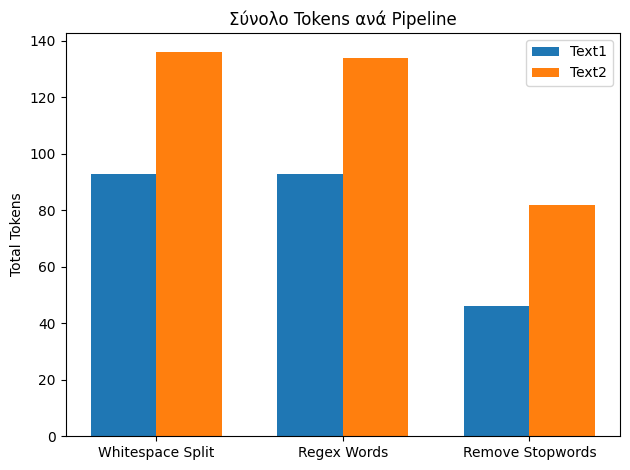

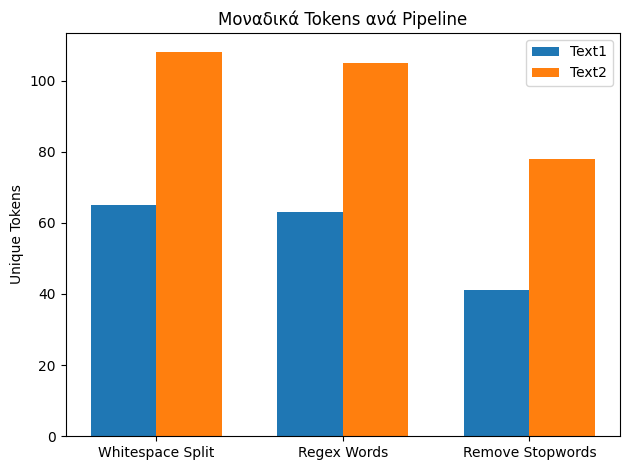

In [11]:
import matplotlib.pyplot as plt

# Reconstructed texts από κάθε pipeline (όπως παρείχες)
reconstructions = {
    "Whitespace Split": {
        "Text1": """today is our dragon boat festival, in our chinese culture, to celebrate it with all safe and great in our lives. hope you too, to enjoy it as my deepest wishes. thank your message to show our words to the doctor, as his next contract checking, to all of us. i got this message to see the approved message. in fact, i have received the message from the professor, to show me, this, a couple of days ago. i am very appreciated the full support of the professor, for our springer proceedings publication""",
        "Text2": """during our final discuss, i told him about the new submission — the one we were waiting since last autumn, but the updates was confusing as it not included the full feedback from reviewer or maybe editor? anyway, i believe the team, although bit delay and less communication at recent days, they really tried best for paper and cooperation. we should be grateful, i mean all of us, for the acceptance and efforts until the springer link came finally last week, i think. also, kindly remind me please, if the doctor still plan for the acknowledgments section edit πριν he sending again. because i didn’t see that part final yet, or maybe i missed, i apologize if so. overall, let us make sure all are safe and celebrate the outcome με strong coffee and future targets"""
    },
    "Regex Words": {
        "Text1": """today is our dragon boat festival in our chinese culture to celebrate it with all safe and great in our lives hope you too to enjoy it as my deepest wishes thank your message to show our words to the doctor as his next contract checking to all of us i got this message to see the approved message in fact i have received the message from the professor to show me this a couple of days ago i am very appreciated the full support of the professor for our springer proceedings publication""",
        "Text2": """during our final discuss i told him about the new submission the one we were waiting since last autumn but the updates was confusing as it not included the full feedback from reviewer or maybe editor anyway i believe the team although bit delay and less communication at recent days they really tried best for paper and cooperation we should be grateful i mean all of us for the acceptance and efforts until the springer link came finally last week i think also kindly remind me please if the doctor still plan for the acknowledgments section edit he sending again because i didn t see that part final yet or maybe i missed i apologize if so overall let us make sure all are safe and celebrate the outcome strong coffee and future targets"""
    },
    "Remove Stopwords": {
        "Text1": """today dragon boat festival chinese culture celebrate safe great lives hope too enjoy deepest wishes thank your message show words doctor next contract checking us got message see approved message fact received message professor show couple days ago am appreciated full support professor springer proceedings publication""",
        "Text2": """final discuss told him about new submission one were waiting autumn updates confusing included full feedback reviewer maybe editor anyway believe team although bit delay less communication recent days really tried best paper cooperation grateful mean us acceptance efforts springer link came finally week think also kindly remind please if doctor still plan acknowledgments section edit he sending again because didn t see part final yet maybe missed apologize if overall let us make sure safe celebrate outcome strong coffee future targets"""
    }
}

# Υπολογισμός μετρικών
pipelines = list(reconstructions.keys())
metrics = {
    "Pipeline": [],
    "Text": [],
    "Total Tokens": [],
    "Unique Tokens": []
}

for pipeline in pipelines:
    for text_label in ["Text1", "Text2"]:
        tokens = reconstructions[pipeline][text_label].split()
        metrics["Pipeline"].append(pipeline)
        metrics["Text"].append(text_label)
        metrics["Total Tokens"].append(len(tokens))
        metrics["Unique Tokens"].append(len(set(tokens)))

# Ετοιμασία για plot
total_text1 = [metrics["Total Tokens"][i] for i in range(len(metrics["Pipeline"])) if metrics["Text"][i] == "Text1"]
unique_text1 = [metrics["Unique Tokens"][i] for i in range(len(metrics["Pipeline"])) if metrics["Text"][i] == "Text1"]
total_text2 = [metrics["Total Tokens"][i] for i in range(len(metrics["Pipeline"])) if metrics["Text"][i] == "Text2"]
unique_text2 = [metrics["Unique Tokens"][i] for i in range(len(metrics["Pipeline"])) if metrics["Text"][i] == "Text2"]

x = range(len(pipelines))
width = 0.35

# Διάγραμμα 1: Σύνολο Tokens
plt.figure()
plt.bar([xi - width/2 for xi in x], total_text1, width, label="Text1")
plt.bar([xi + width/2 for xi in x], total_text2, width, label="Text2")
plt.xticks(x, pipelines)
plt.ylabel("Total Tokens")
plt.title("Σύνολο Tokens ανά Pipeline")
plt.legend()
plt.tight_layout()

# Διάγραμμα 2: Μοναδικά Tokens
plt.figure()
plt.bar([xi - width/2 for xi in x], unique_text1, width, label="Text1")
plt.bar([xi + width/2 for xi in x], unique_text2, width, label="Text2")
plt.xticks(x, pipelines)
plt.ylabel("Unique Tokens")
plt.title("Μοναδικά Tokens ανά Pipeline")
plt.legend()
plt.tight_layout()

plt.show()
